In [1]:
#| include: false
!pip install git+https://github.com/fastai/fastai
!pip install git+https://github.com/fastai/fastcore

  Cloning https://github.com/fastai/fastai to /tmp/pip-req-build-2clq4bi0
  Running command git clone -q https://github.com/fastai/fastai /tmp/pip-req-build-2clq4bi0
     |████████████████████████████████| 56 kB 2.3 MB/s 
  Created wheel for fastai: filename=fastai-2.5.4-py3-none-any.whl size=186977 sha256=f2fbd4339efb6ae49606b5cf48685cb4743eb90b9c0a065f37ebabd282f69e4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vxob68eu/wheels/40/be/4f/b7f2aec4df5712626ceed9f20a8996eb05e31244e57e58d632
Successfully built fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
  Cloning https://github.com/fastai/fastcore to /tmp/pip-req-build-mnmw3bfz
  Running command git clone -q https://github.com/fastai/fastcore /tmp/pip-req-build-mnmw3bfz
  Created wheel for fastcore: filename=fastcore-1.3.27-py3-none-any.whl size=55581 sha256=1e8ecf8c905c667cb8aa4de8ca03098bef1fc3b099ae2171018425961398

We start off by following Chapter 18 of {% cite fastbook2020 %}.

In [2]:
#| include: false 
from fastai.vision.all import *

Load the pets dataset. We have a cat image if the filename starts with an uppercase letter otherwise it is a dog image. Thus, an output of False (or 0) corresponds to a dog image while True (or 1) corresponds to a cat image. 

In [3]:
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()

set_seed(42, reproducible=True)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=21,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#collapse-output
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
#collapse-output
learn.model[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
#collapse-output
learn.model[1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=2, bias=False)
)

In [4]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.139079,0.015485,0.004060,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.055484,0.008766,0.002030,02:21


Download a sample image for which we will extract activations from the model.

In [5]:
#collapse-output
!cd sample_data/ && wget https://wallup.net/wp-content/uploads/2016/01/18662-cat-Nikon-camera-animals-biting.jpg

--2021-10-25 18:30:27--  https://wallup.net/wp-content/uploads/2016/01/18662-cat-Nikon-camera-animals-biting.jpg
Resolving wallup.net (wallup.net)... 104.21.67.12, 172.67.167.152, 2606:4700:3030::6815:430c, ...
Connecting to wallup.net (wallup.net)|104.21.67.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpg]
Saving to: ‘18662-cat-Nikon-camera-animals-biting.jpg’

18662-cat-Nikon-cam     [   <=>              ] 661.12K  1.48MB/s    in 0.4s    

2021-10-25 18:30:28 (1.48 MB/s) - ‘18662-cat-Nikon-camera-animals-biting.jpg’ saved [676983]



In [6]:
img = PILImage.create('sample_data/18662-cat-Nikon-camera-animals-biting.jpg')
x, = first(dls.test_dl([img]))

In [ ]:
x.shape

torch.Size([1, 3, 224, 224])

In [7]:
class Hook():
    def hook_func(self, m, i, o): self.stored = o.detach().clone()

In [8]:
hook_output = Hook()
hook = learn.model[0].register_forward_hook(hook_output.hook_func)

with torch.no_grad(): output = learn.model.eval()(x)

act = hook_output.stored[0]

act.shape, output.shape, learn.model[1][-1].weight.shape

(torch.Size([512, 7, 7]), torch.Size([1, 2]), torch.Size([2, 512]))

The output from the final linear layer is as follows:

In [9]:
output

tensor([[-11.0284,  10.0199]], device='cuda:0')

Pass these through a softmax to get the predictions.

In [10]:
F.softmax(output, dim=-1)

tensor([[7.2253e-10, 1.0000e+00]], device='cuda:0')

Our model is very confident that this is a cat image. Recall that $0$ encodes the class dog while $1$ encodes cat.

In [11]:
cam_map = torch.einsum('ck,kij->cij', learn.model[1][-1].weight, act)
cam_map.shape

torch.Size([2, 7, 7])

In [12]:
#collapse-output
cam_map

tensor([[[ 2.4612,  2.2954,  2.6431,  2.6772,  2.2160,  0.7992,  0.1278],
         [ 2.4558,  2.4668,  2.6862,  2.7808,  3.5802,  3.8468,  2.2116],
         [ 2.4177,  1.4307,  0.6136,  1.9688,  3.1065,  4.2844,  4.0371],
         [ 3.1196,  2.8230,  1.0616,  1.4165,  4.1816,  7.1037,  7.4767],
         [ 1.6073,  2.0172,  1.8519,  3.1966,  5.6278,  6.5893,  5.9116],
         [ 3.6521,  5.5285,  4.9569,  5.3924,  5.6237,  5.3038,  4.2787],
         [ 4.7321,  5.9305,  4.7503,  4.2259,  4.8412,  3.8734,  1.8111]],

        [[-1.7039, -0.6877, -0.9466, -1.1840, -1.4696, -1.5489, -1.1791],
         [-2.1570, -2.2049, -2.1784, -2.7038, -1.0871, -0.4607, -1.5684],
         [-4.5787, -4.8054, -2.9991, -2.3972,  1.1643,  3.3241,  1.6656],
         [-2.7080, -2.8545, -1.7021, -1.4661,  0.9079,  3.0881,  2.8714],
         [-0.1489,  1.2784,  0.8865,  0.2769,  0.3615,  0.9657,  0.2920],
         [ 1.1236,  2.5738,  0.8960,  0.1405,  1.0975,  0.5311,  0.6032],
         [ 2.1957,  2.4272,  0.7434,

From the book, "*note that we need to decode the input x since it's been normalized by the DataLoader, and we need to cast to TensorImage since at the time this book is written PyTorch does not maintain types when indexing*".

In [13]:
#collapse-output
decoded = dls.train.decode((x,))
decoded

(TensorImage([[[[219, 220, 221,  ...,   8,   8,   7],
           [220, 220, 221,  ...,   8,  10,  10],
           [222, 221, 221,  ...,   9,  10,  10],
           ...,
           [ 14,  29,  23,  ...,  60,  54,  60],
           [  4,  20,  36,  ...,  42,  44,  49],
           [  4,   7,  29,  ...,  43,  44,  43]],
 
          [[215, 216, 217,  ...,   7,   6,   6],
           [216, 216, 217,  ...,   6,   7,   7],
           [218, 217, 217,  ...,   6,   7,   7],
           ...,
           [ 11,  24,  14,  ...,  37,  30,  35],
           [  2,  14,  27,  ...,  26,  27,  29],
           [  1,   4,  22,  ...,  28,  29,  27]],
 
          [[214, 215, 215,  ...,   2,   1,   1],
           [214, 213, 214,  ...,   1,   0,   0],
           [215, 214, 214,  ...,   1,   0,   0],
           ...,
           [  4,  12,   7,  ...,  14,  12,  15],
           [  0,   6,  17,  ...,   6,  11,  11],
           [  0,   2,  15,  ...,  10,  10,   8]]]]),)

In [14]:
decoded[0].shape, decoded[0][0].shape

(torch.Size([1, 3, 224, 224]), torch.Size([3, 224, 224]))

In [16]:
def plot_image(the_map, the_alpha=0.6):
  x_dec = TensorImage(decoded[0][0])
  _,ax = plt.subplots()
  x_dec.show(ctx=ax)
  ax.imshow(the_map.detach().cpu(), alpha=the_alpha, extent=(0,224,224,0),
            interpolation='bilinear', cmap='magma');

First look at the areas of the picture that influence the network to decide that something may be a dog image.  Bright yellow correspond to high activations while areas in purple correspond to low activations

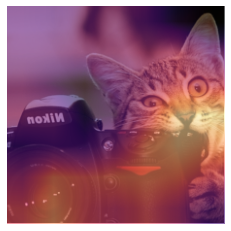

In [17]:
plot_image(cam_map[0])

The network appears to be focussing on the mouth.

Next look at the areas of the picture that influence the network to decide that something is a cat image.

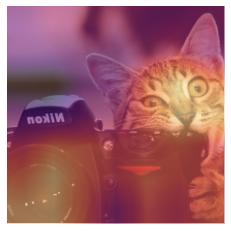

In [18]:
plot_image(cam_map[1])

The network appears to be focussing on the entire face in the decision to label this as a cat image.

Compare this to a random activations map where there is no singular area of focus.

In [23]:
#collapse-output
rand_cmap = torch.randn((7,7), device='cuda:0')
rand_cmap

tensor([[-0.7637, -1.3432,  1.1882, -0.3386, -0.6900, -0.6698, -0.5695],
        [ 1.1075, -1.1094, -0.2857,  1.3275,  0.8616,  1.9981,  0.8572],
        [-0.3191, -0.8256,  0.6985,  0.1862,  0.1230, -1.1539, -0.0230],
        [-0.7334, -0.8848,  0.1476, -0.8934,  0.6844,  0.4076, -0.7339],
        [ 1.0249,  0.6300, -0.1655,  0.6776,  0.8610, -0.9098,  0.2662],
        [-0.1487,  0.7496,  1.2978,  0.9887, -0.6177,  0.2148, -0.4154],
        [-0.6950, -0.6311, -0.7638,  0.0544, -1.0707, -0.4667, -1.0079]],
       device='cuda:0')

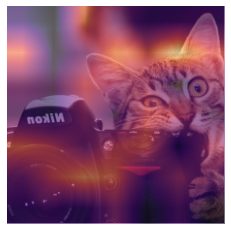

In [24]:
plot_image(rand_cmap)

Let's create some fake maps just to get a sense for how this overlay of the map over the cat image works. The alpha determines the extent to which the map dominates the original image. Use alpha = 1 to just display the map by itself (here the cat image is not seen at all).

In [27]:
my_map = tensor([[0., 0., 1., 0., 0., 0., 0.],
        [ 1., 1., 1., 1., 1., 1., 1.],
        [ 0., 0., 1., 0., 0., 0., 0.],
        [ 0., 0., 1., 0., 0., 0., 0.],
        [ 0., 0., 1., 0., 0., 0., 0.],
        [ 1., 1., 1., 1., 1., 1., 1.],
        [ 0., 0., 0., 0., 0., 0., 0.]],
       device='cuda:0')

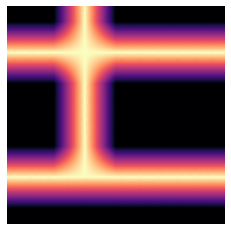

In [30]:
plot_image(my_map, the_alpha=1.)

So the row and column of ones show up as yellow. Next reduce the value of alpha so the cat image can also be seen.

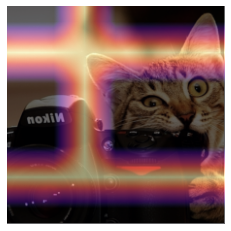

In [33]:
plot_image(my_map, the_alpha= 0.6)

In the following map we put weight mainly on the left half.

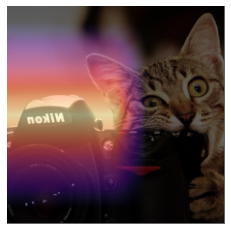

In [34]:
my_map = tensor([[0., 0., 0.,  0.,  0., 0., 0.],
        [ 1.,  1., 1., 1., 0.,  0.,  0.],
        [ 2.,  2., 2., 2., 0.,  0.,  0.],
        [ 3.,  3., 3., 3., 0.,  0.,  0.],
        [ 2.,  2., 2., 2., 0.,  0.,  0.],
        [ 1.,  1., 1., 1., 0.,  0.,  0.],
        [ 0.,  0., 0., 0., 0.,  0.,  0.]],
       device='cuda:0')

plot_image(my_map, the_alpha= 0.6)

Finally remove the hook so it doesn't leak any memory.

In [ ]:
hook.remove()

# References
{% bibliography --cited %}